# Chuẩn bị dữ liệu

In [75]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Loại bỏ những thông báo không cần thiết trong quá trình thực thi
warnings.filterwarnings('ignore')

# Load bộ dữ liệu vào biến 'data'
file_path = './social_media_data_1000 (1).csv'
data = pd.read_csv(file_path)

# Một số quan sát về dữ liệu

In [76]:
# Xem 5 dòng đầu dữ liệu
data.head()

,Post_ID,User_ID,Age,Gender,Post_Content,Likes,Shares,Comments,Post_Date
0,1,754,25,Male,Enjoying the weather,62,14,4,2024-09-24 03:43:00
1,2,858,52,Male,Watching a movie,108,2,0,2024-09-03 06:14:00
2,3,617,56,Male,Celebrating a birthday,50,45,20,2024-09-23 17:26:00
3,4,325,46,Female,Great day at the park,194,10,22,2024-09-14 10:17:00
4,5,259,31,Female,New blog post up!,23,24,3,2024-09-12 11:38:00


In [77]:
# Xem cấu trúc dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Post_ID       1000 non-null   int64 
 1   User_ID       1000 non-null   int64 
 2   Age           1000 non-null   int64 
 3   Gender        1000 non-null   object
 4   Post_Content  1000 non-null   object
 5   Likes         1000 non-null   int64 
 6   Shares        1000 non-null   int64 
 7   Comments      1000 non-null   int64 
 8   Post_Date     1000 non-null   object
dtypes: int64(6), object(3)
memory usage: 70.4+ KB


Nhận thấy ở đây vẫn còn một số thuộc tính có kiểu 'Object' (tức là cột vẫn chưa xác định được kiểu dữ liệu chuẩn), vì vậy ta sẽ tiến hành đặt lại kiểu dữ liệu cho các thuộc tính này bao gồm:
- 'Gender': chuyển về kiểu dữ liệu 'category', vì sẽ tối ưu vùng nhớ và cho tốc độ xử lý tốt hơn, phù hợp hơn với kiểu thuộc tính chỉ có vài loại giá trị.
- 'Post_Content': chuyển về kiểu 'str' cho loại dữ liệu văn bản.
- 'Post_Date': đưa về định dạng datetime tương ứng
> Mục đích khi chuẩn hóa kiểu dữ liệu là để đảm bảo tính đúng đắn và đầy đủ của dữ liệu, tạo điều kiện thuận lợi cho những phân tích có liên quan sau này.

In [78]:
# Chỉ định kiểu dữ liệu cho `Gender` và `Post_Content`
data['Gender'] = data['Gender'].astype('category')
data['Post_Content'] = data['Post_Content'].astype('string')
data['Post_Date'] = pd.to_datetime(data['Post_Date'])

In [79]:
# Xem thống kê tổng quát của một số thuộc tính
data.describe()

,Post_ID,User_ID,Age,Likes,Shares,Comments,Post_Date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,602.233000,39.217000,103.040000,25.346000,14.814000,2024-09-17 04:44:00.420000
min,1.000000,100.000000,18.000000,0.000000,0.000000,0.000000,2024-09-01 00:09:00
25%,250.750000,365.750000,28.000000,51.000000,12.750000,7.000000,2024-09-09 23:51:15
50%,500.500000,594.000000,39.000000,107.000000,25.000000,15.000000,2024-09-17 13:13:30
75%,750.250000,853.000000,50.000000,154.250000,39.000000,22.000000,2024-09-24 11:36:15
max,1000.000000,1100.000000,60.000000,200.000000,50.000000,30.000000,2024-10-01 23:43:00
std,288.819436,288.982192,12.419829,58.970857,14.849943,8.787185,NaN


# Xây dựng một số hàm cần thiết cho việc phân tích

In [81]:
# Hàm phân loại độ tuổi
def age_grouping(age):
    if 18 <= age < 31:
        return '18-30'
    elif 31 <= age < 41:
        return '31-40'
    elif 41 <= age < 51:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return 'Khác'  # Để xử lý các trường hợp ngoài phạm vi

# Một số phân tích cơ bản về dữ liệu

# **YÊU CẦU 1: Xác định mối quan hệ giữa số lượt thích của một bài đăng và độ tuổi của người đăng**

Đầu tiên, để đơn giản hóa, ta có thể xem xét mối quan hệ trực tiếp giữa số lượt thích và độ tuổi sử dụng biểu đồ cột, biểu đồ hộp hay biểu đồ phân tán.

Giải thích lý do sử dụng các biểu đồ trên:
- Biểu đồ cột: đây là loại biểu đồ phù hợp khi hai thuộc tính đang xét có 1 loại là category (Age - vì có thể chia thành các nhóm tuổi) và 1 loại là numeric (Likes).
- Biểu đồ hộp: biểu đồ dùng cho việc quan sát phân bố của các điểm dữ liệu.
- Biểu đồ phân tán: một trong những biểu đồ cơ bản để quan sát mối quan hệ của 2 thuộc tính.

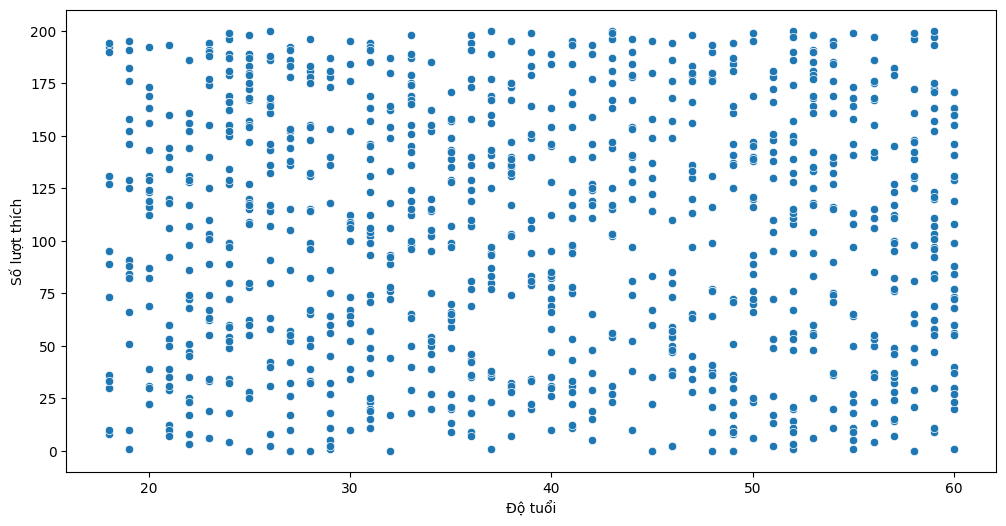

In [82]:
# Vẽ biểu đồ phân tán của số lượt thích và độ tuổi
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Likes', data=data)
plt.title('')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.show()

> Insight (1): dựa vào biểu đồ scatter thu được, dễ dàng nhận ra với bộ dữ liệu này thì giữa số lượt thích và độ tuổi không thể hiện bất kì một mối quan hệ trực tiếp nào cả vì sự phân bố của các điểm dữ liệu khá ngẫu nhiên và rời rạc.

Tuy nhiên, cần có thêm những phân tích sâu hơn trước khi kết luận về mối quan hệ giữa hai thuộc tính này.

In [83]:
data['Grouped_Age'] = data['Age'].apply(age_grouping)

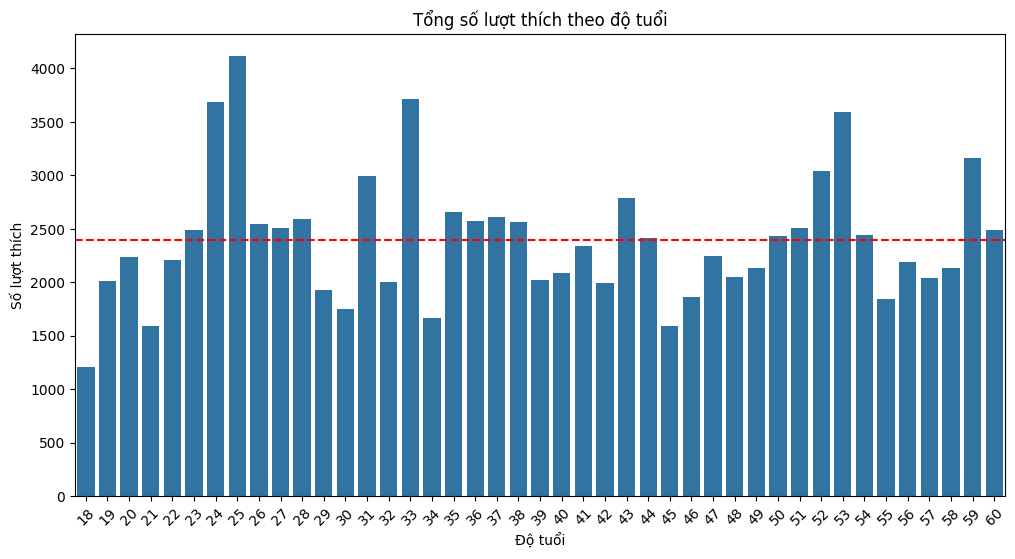

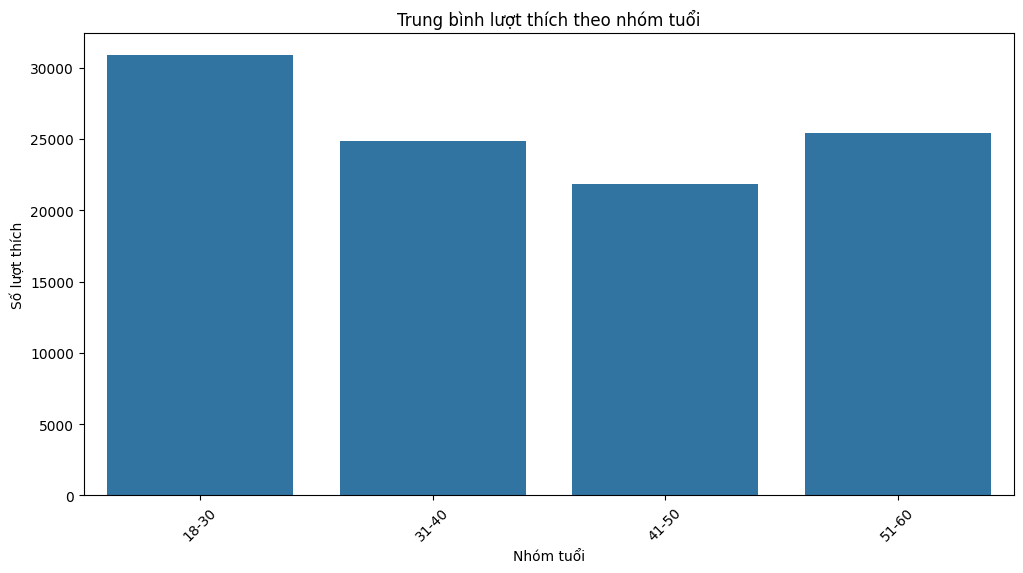

In [84]:
# Vẽ biểu đồ cột tổng số lượt thích theo độ tuổi
total_likes_by_age = data.groupby('Age')['Likes'].sum().reset_index()
mean_total_likes_by_age = total_likes_by_age['Likes'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Likes', data=total_likes_by_age)
plt.title('Tổng số lượt thích theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)
plt.axhline(mean_total_likes_by_age, color='red', linestyle='--', label=f'Trung bình: {mean_total_likes_by_age:.2f}') # Vẽ đường trung bình
plt.show()

# Vẽ biểu đồ cột tổng số lượt thích theo nhóm tuổi
total_likes_by_grouped_age = data.groupby('Grouped_Age')['Likes'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Grouped_Age', y='Likes', data=total_likes_by_grouped_age)
plt.title('Trung bình lượt thích theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)
plt.show()

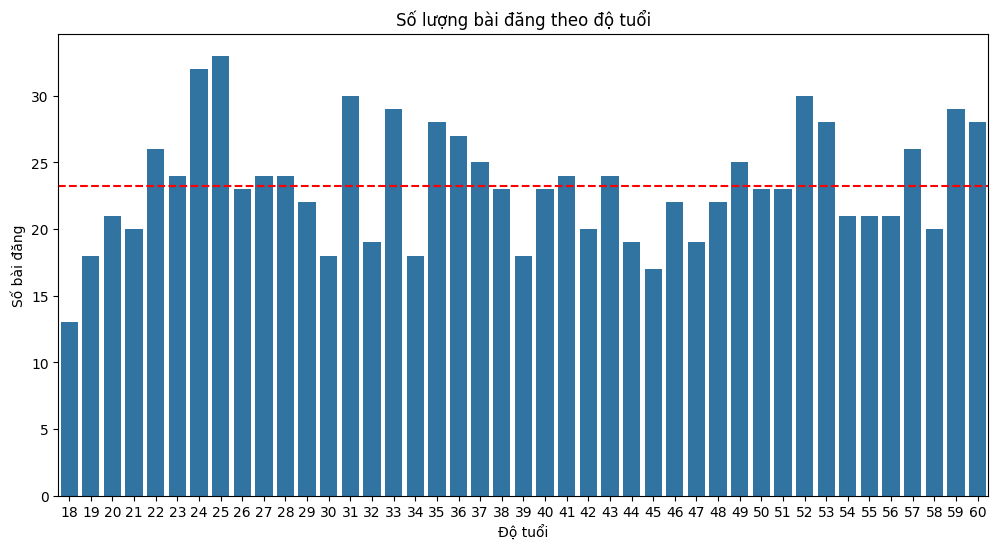

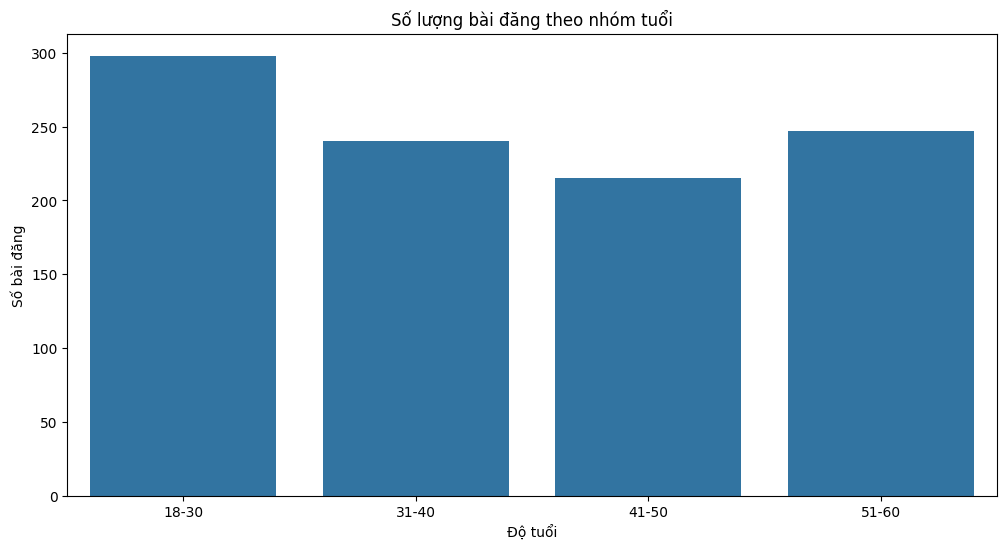

In [85]:
# Số lượng bài viết cho mỗi độ tuổi
posts_by_age = data['Age'].value_counts().sort_index()
mean_posts_by_age = posts_by_age.mean()

# Vẽ biểu đồ cột thể hiện số lượng bài đăng của mỗi độ tuổi
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_by_age.index, y=posts_by_age.values)
plt.title('Số lượng bài đăng theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số bài đăng')
plt.axhline(mean_posts_by_age, color='red', linestyle='--', label=f'Trung bình: {mean_posts_by_age:.2f}') # Vẽ đường trung bình
plt.show()

# Vẽ biểu đồ cột thể hiện số lượng bài đăng của mỗi nhóm tuổi
posts_by_grouped_age = data['Grouped_Age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=posts_by_grouped_age.index, y=posts_by_grouped_age.values)
plt.title('Số lượng bài đăng theo nhóm tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số bài đăng')
plt.show()

Qua hai phân tích trên, ta có thể thấy hình dạng của biểu đồ "tổng lượt thích theo độ tuổi" và "số bài đăng theo độ tuổi" có hình dạng khá tương đồng, điều này càng rõ hơn khi ta quan sát hai biểu đồ theo nhóm tuổi. Đây có thể là "manh mối" cho ta thấy được có mối liên hệ nào đó giữa tổng số lượt thích và số bài đăng theo từng độ tuổi.

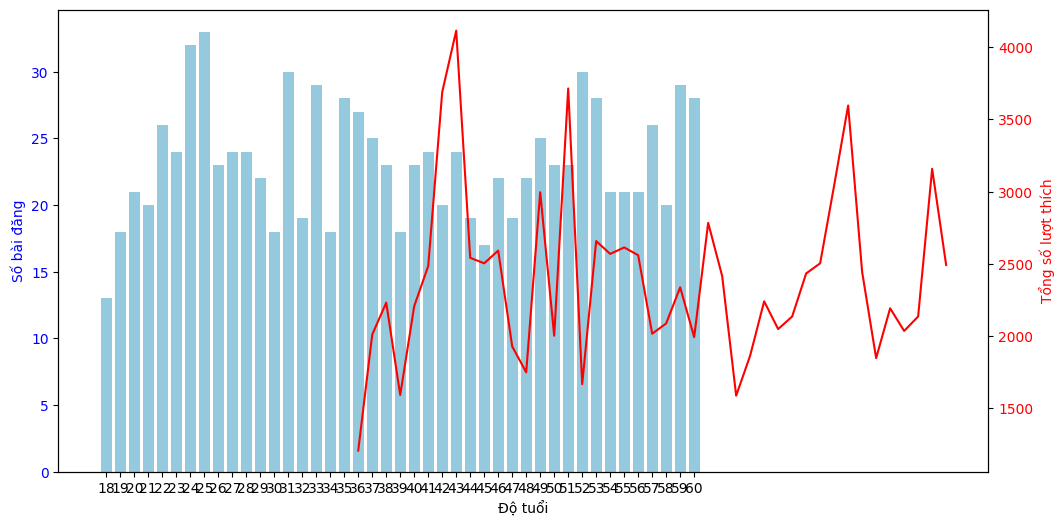

In [67]:
# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Xác định thứ tự các giá trị trên trục X để cả hai biểu đồ khớp
age_order = posts_by_age.index

# Vẽ biểu đồ cột cho số bài đăng
sns.barplot(x=posts_by_age.index, y=posts_by_age.values, color='skyblue', ax=ax1, order=age_order)

ax1.set_xlabel('Độ tuổi')
ax1.set_ylabel('Số bài đăng', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Tạo trục Y thứ hai để vẽ biểu đồ đường
ax2 = ax1.twinx()

# Vẽ biểu đồ đường cho tổng số lượt thích
sns.lineplot(x=total_likes_by_age['Age'].sort_index(), y=total_likes_by_age['Likes'], color='red', ax=ax2)

ax2.set_ylabel('Tổng số lượt thích', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('')
plt.show()

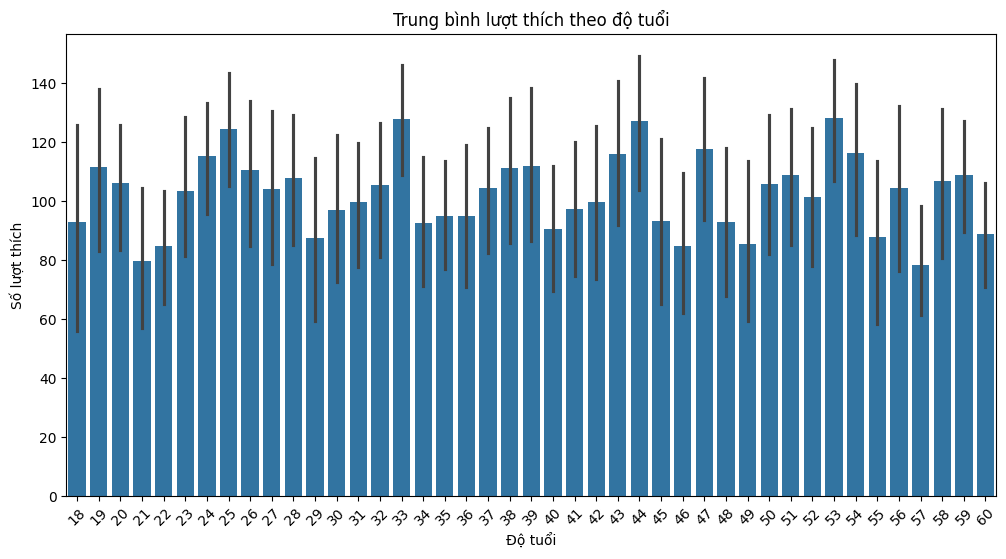

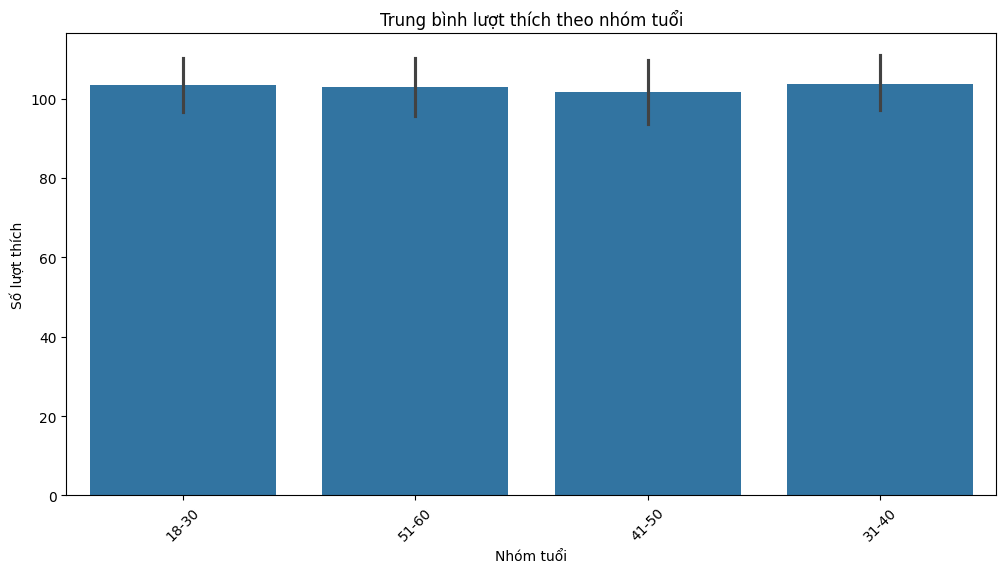

In [33]:
# Vẽ biểu đồ cột giữa độ tuổi và số lượt thích
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Likes', data=data)
plt.title('Trung bình lượt thích theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)
plt.show()

# Vẽ biểu đồ cột giữa nhóm tuổi và số lượt thích
plt.figure(figsize=(12, 6))
sns.barplot(x='Grouped_Age', y='Likes', data=data)
plt.title('Trung bình lượt thích theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)
plt.show()

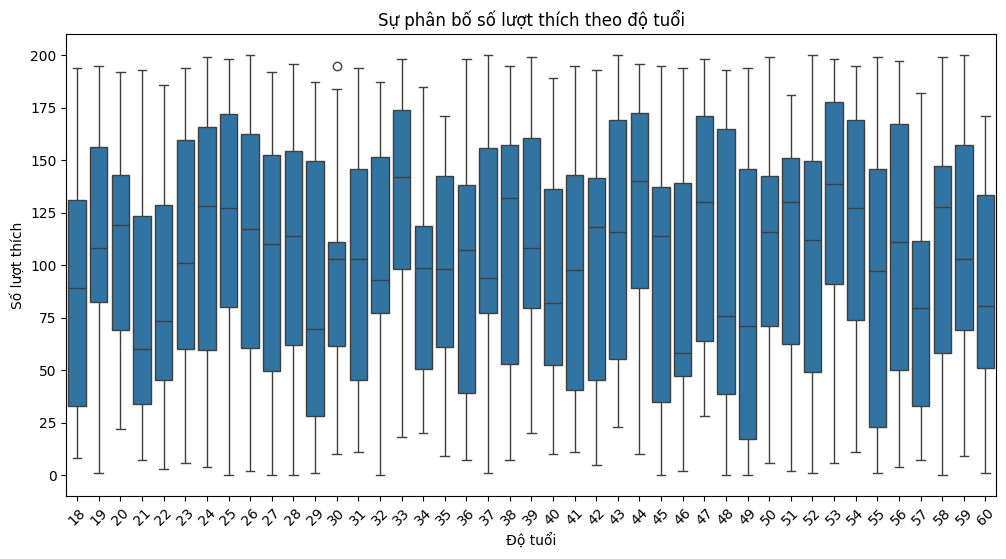

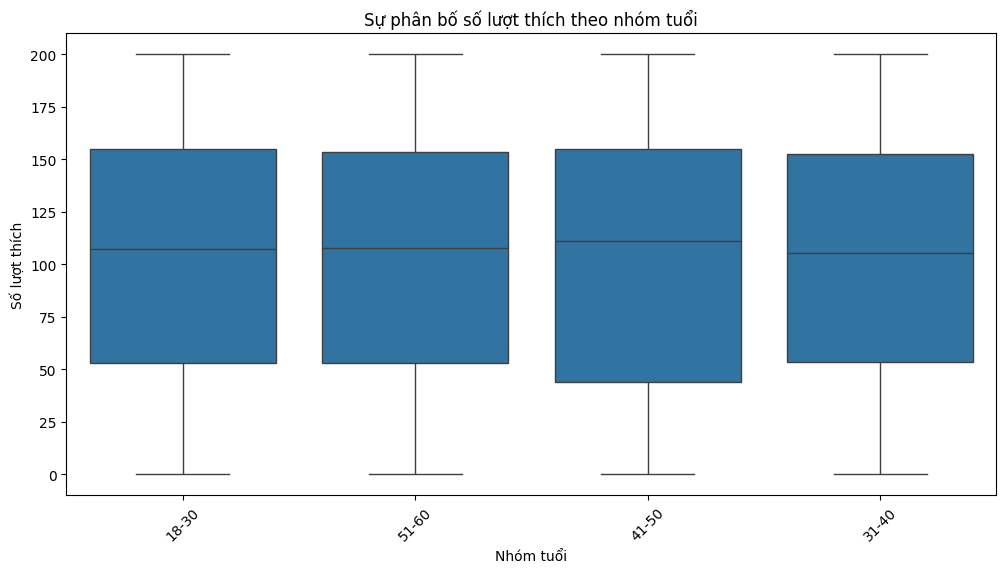

In [29]:
# Vẽ box plot để thể hiện mối quan hệ giữa số lượt thích và độ tuổi
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Likes', data=data)
plt.title('Sự phân bố số lượt thích theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.show()

# Vẽ box plot để thể hiện mối quan hệ giữa số lượt thích và nhóm tuổi
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grouped_Age', y='Likes', data=data)
plt.title('Sự phân bố số lượt thích theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.show()